### Process_data_agent_scores.ipynb

- This notebook runs through each agent in a file, and finds the decision that is most ideal for that agent and saves this to a file
- The notebook also will run each column through a factor, pushing decisions to the extremes for ease of example

In [193]:
import pandas as pd

filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/processed_data_one_action_ess.csv"
savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/processed_data_ess_with_decisions.csv"

#### Convert decisions to extremes for example by some factor

In [198]:
df = pd.read_csv(filename)

# factor = 0
factor = 5.0


for index, row in df.iterrows():
    # Preferences (0, 1)
    df.at[index, 'Rel-Nonrel'] = row['rel'] / (row['rel'] + row['nonrel'])
    df.at[index, 'Nonrel-Rel'] = row['nonrel'] / (row['rel'] + row['nonrel'])

    diff = (df.at[index, 'Rel-Nonrel'] - df.at[index, 'Nonrel-Rel']) * factor
    df.at[index, 'Rel-Nonrel'] = df.at[index, 'Rel-Nonrel'] + diff / 2
    df.at[index, 'Nonrel-Rel'] = df.at[index, 'Nonrel-Rel'] - diff / 2

    # Actions (-1, 1)
    action_diff = (row['a_div_rel'] - row['a_div_nonrel']) * factor
    df.at[index, 'a_div_rel'] = max(-1, min(1, 0.5 + action_diff / 2))
    df.at[index, 'a_div_nonrel'] = max(-1, min(1, 0.5 - action_diff / 2))

df
#df.to_csv(filename+"_with_factor.csv", index=False)


,Unnamed: 0,country,rel,nonrel,a_div_rel,a_div_nonrel,Rel-Nonrel,Nonrel-Rel
0,0,AT,642,1216,0.338443,0.661557,-0.426803,1.426803
1,1,BE,621,1116,0.476213,0.523787,-0.354922,1.354922
2,2,CH,767,666,0.221354,0.778646,0.711445,0.288555
3,3,CZ,577,1483,0.480949,0.519051,-0.819417,1.819417
4,4,DE,1264,1488,0.335023,0.664977,0.255814,0.744186
5,5,EE,802,1118,0.557065,0.442935,0.006250,0.993750
6,6,ES,567,1143,0.396032,0.603968,-0.510526,1.510526
7,7,FI,739,1099,0.267452,0.732548,-0.087595,1.087595
8,8,FR,1063,899,0.271657,0.728343,0.750765,0.249235
9,9,GB,541,1287,0.393762,0.606238,-0.724289,1.724289


#### Compute decisions
- To do this, you need to have the generated principles
    - To get accurate generated principles, you must have aggregated between 1.0-10.0 on agents current personal values 

In [ ]:
# Compute decision
df = pd.read_csv(filename)
for index, row in df.iterrows():
    df.at[index, 'decision'] = (df.at[index, 'Rel-Nonrel'] * row['a_div_rel']) + (df.at[index, 'Nonrel-Rel'] * row['a_div_nonrel'])
df.rename(columns={'a_div_rel': 'Rel_div_p', 'a_div_nonrel': 'Nonrel_div_p'}, inplace=True)

# the processed_data_with_principles is the file that contains the principles for each country  
principle_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/processed_data_with_principles_ess.csv"
pri_df = pd.read_csv(principle_filename)
pri_df.rename(columns={'rel': 'egal', 'nonrel' : 'util'}, inplace=True)
df = pd.merge(df, pri_df)

# Now create Egal-Util and Util-Egal columns in the same format as Rel-Nonrel and Nonrel-Rel
for index, row in df.iterrows():
    df.at[index, 'Egal-Util'] = row['egal'] / (row['egal'] + row['util'])
    df.at[index, 'Util-Egal'] = row['util'] / (row['egal'] + row['util'])

df

,Unnamed: 0,country,rel,nonrel,Rel_div_p,Nonrel_div_p,Rel-Nonrel,Nonrel-Rel,decision,egal,util,Egal-Util,Util-Egal
0,0,AT,642,1216,0.047767,0.112390,0.345533,0.654467,0.090061,1784.0,74.0,0.960172,0.039828
1,1,BE,621,1116,-0.063875,-0.054361,0.357513,0.642487,-0.057762,330.0,1407.0,0.189983,0.810017
2,2,CH,767,666,0.150804,0.262262,0.535241,0.464759,0.202605,1204.0,229.0,0.840195,0.159805
3,3,CZ,577,1483,0.021375,0.028995,0.280097,0.719903,0.026861,721.0,1339.0,0.350000,0.650000
4,4,DE,1264,1488,0.002110,0.068100,0.459302,0.540698,0.037791,1954.0,798.0,0.710029,0.289971
5,5,EE,802,1118,0.072319,0.049493,0.417708,0.582292,0.059028,710.0,1210.0,0.369792,0.630208
6,6,ES,567,1143,0.014697,0.056285,0.331579,0.668421,0.042495,1659.0,51.0,0.970175,0.029825
7,7,FI,739,1099,-0.098782,-0.005763,0.402067,0.597933,-0.043163,386.0,1452.0,0.210011,0.789989
8,8,FR,1063,899,0.021010,0.112347,0.541794,0.458206,0.062861,844.0,1118.0,0.430173,0.569827
9,9,GB,541,1287,0.008010,0.050505,0.295952,0.704048,0.037929,1280.0,548.0,0.700219,0.299781


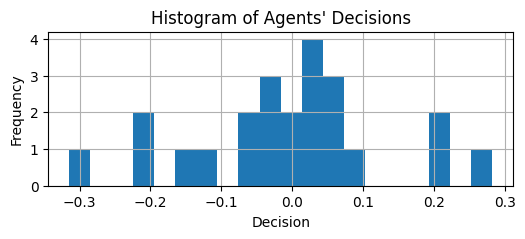

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 2))
df['decision'].hist(bins=20)
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.title('Histogram of Agents\' Decisions')
plt.show()

#### Grab consensus value system and store decisions for each relevant consensus

In [177]:
# As a quick check, we will find an alternative HCVA for agents by simply finding the average of 
#   the two principle preferences, and then convert the mean preferences to a P value (i.e. a number between 0 and 10)

mean_principles = [df['egal'].mean(), df['util'].mean()]
print(mean_principles)
# Convert the mean preferences to a P value
# Normalize the mean principles to a range between 0 and 1
normalized_principles = [mean_principles[0] / (mean_principles[0] + mean_principles[1]), 
                         mean_principles[1] / (mean_principles[0] + mean_principles[1])]
print(normalized_principles)
# Convert the normalized principles to a P value between 1 and 10
p_value = 1 + 9 * (1-normalized_principles[1])
print(f"Converted P value: {p_value}")


[773.0, 963.4782608695652]
[0.4451538596359448, 0.5548461403640552]
Converted P value: 5.006384736723503


In [178]:
#####
# 1.0 = Utilitarian, 1.3 = Transition point, 2.0 = HCVA, 10.0 = Egalitarian
###
relevent_consensuses =  [1.0, 1.3, 2.0, 10.0]
#relevent_consensuses = [round(x * 0.1, 1) for x in range(10, 101)]
relevent_columns = ['p','Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p', 'Egal-Util', 'Util-Egal']


#preference_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/results/31-10-results-preference.csv"
#actions_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/results/31-10-results-actions.csv"

actions_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/1-11-results-actions.csv"
preference_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/1-11-results-preferences.csv"

final_df_savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/3-11-ess-relevant-consensus.csv"

pref_df = pd.read_csv(preference_filename)
act_df = pd.read_csv(actions_filename)
cons_df = pd.merge(pref_df, act_df, on='p')
cons_df['p'] = cons_df['p'].round(1)

# for each row, find the corresponding Util-Egal and Egal-Util values (where P=1.0 has Util-Egal=1.0 and Egal-Util=0.0, and P=10.0 has Util-Egal=0.0 and Egal-Util=1.0)
for index, row in cons_df.iterrows():
    cons_df.at[index, 'Egal-Util'] = (row['p'] - 1) / 9
    cons_df.at[index, 'Util-Egal'] = 1 - cons_df.at[index, 'Egal-Util']


cons_df


,p,Up_x,Dist1_x,Distl_x,Rel-Rel,Rel-Nonrel,Nonrel-Rel,Nonrel-Nonrel,Up_y,Dist1_y,Distl_y,Rel_div_p,Nonrel_div_p,Rel_div_n,Nonrel_div_n,Egal-Util,Util-Egal
0,1.0,4.278681,0.000000,0.032110,0.0,0.346411,0.653589,0.0,9.573980,0.000000,0.042509,0.001517,0.028995,-0.001517,-0.028995,0.000000,1.000000
1,1.1,3.130946,0.000691,0.060989,0.0,0.346043,0.653957,0.0,6.586631,0.015874,0.095706,-0.006315,0.028138,0.006315,-0.028138,0.011111,0.988889
2,1.2,2.422156,0.001092,0.058305,0.0,0.345798,0.654202,0.0,4.832512,0.036973,0.063924,-0.014573,0.022175,0.014573,-0.022175,0.022222,0.977778
3,1.3,1.955035,0.001220,0.055947,0.0,0.345695,0.654305,0.0,3.728159,0.044339,0.048547,-0.018456,0.018935,0.018456,-0.018935,0.033333,0.966667
4,1.4,1.631161,0.001041,0.053723,0.0,0.345776,0.654224,0.0,2.992951,0.046732,0.039915,-0.020717,0.017142,0.020717,-0.017142,0.044444,0.955556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9.7,0.310001,0.027084,0.007404,0.0,0.371627,0.628373,0.0,0.379555,0.057535,0.011877,-0.052050,0.010659,0.052050,-0.010659,0.966667,0.033333
88,9.8,0.309425,0.027161,0.007302,0.0,0.371717,0.628283,0.0,0.378643,0.057583,0.011959,-0.052134,0.010613,0.052134,-0.010613,0.977778,0.022222
89,9.9,0.308863,0.027237,0.007202,0.0,0.371806,0.628194,0.0,0.377755,0.057630,0.012038,-0.052216,0.010568,0.052216,-0.010568,0.988889,0.011111
90,10.0,0.308313,0.027311,0.007103,0.0,0.371893,0.628107,0.0,0.376890,0.057674,0.012114,-0.052295,0.010524,0.052295,-0.010524,1.000000,0.000000


In [179]:
final_df = pd.DataFrame()
for consensus in relevent_consensuses:
    filtered_df = cons_df[cons_df['p'] == consensus][relevent_columns]
    filtered_df['decision'] = (filtered_df['Rel_div_p'] * filtered_df['Rel-Nonrel']) + (filtered_df['Nonrel_div_p'] * filtered_df['Nonrel-Rel'])
    final_df = pd.concat([final_df, filtered_df], ignore_index=True)
final_df.to_csv(final_df_savename)
final_df

,p,Rel-Nonrel,Nonrel-Rel,Rel_div_p,Nonrel_div_p,Egal-Util,Util-Egal,decision
0,1.0,0.346411,0.653589,0.001517,0.028995,0.000000,1.000000,0.019476
1,1.3,0.345695,0.654305,-0.018456,0.018935,0.033333,0.966667,0.006009
2,2.0,0.351466,0.648534,-0.027939,0.013171,0.111111,0.888889,-0.001278
3,10.0,0.371893,0.628107,-0.052295,0.010524,1.000000,0.000000,-0.012838


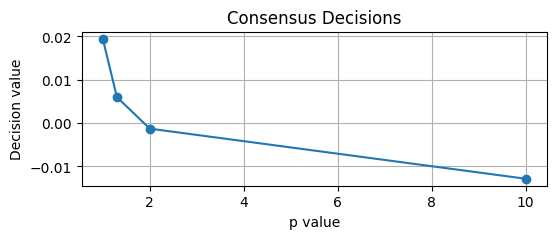

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 2))
plt.plot(final_df['p'], final_df['decision'], marker='o')
plt.xlabel('p value')
plt.ylabel('Decision value')
plt.title('Consensus Decisions')
plt.grid(True)
plt.show()

#### Find the difference between each agent and each of the 4 different strategies (only on decision)

For every agent that has a value system that we have just generated, we now compare the agents decision against the different decisions found by each strategy.

In [181]:

agent_df = df
strategy_df = final_df
agent_df['min_distance'] = agent_df.apply(
    lambda row: min(abs(row['decision'] - strategy_decision) for strategy_decision in strategy_df['decision']),
    axis=1
)

agent_df['closest_p'] = agent_df.apply(
    lambda row: strategy_df.loc[(strategy_df['decision'] - row['decision']).abs().idxmin(), 'p'],
    axis=1
)

agent_df

print(agent_df['closest_p'].value_counts())



closest_p
1.0     11
10.0    11
1.3      1
Name: count, dtype: int64


### Value System Comparison
Instead of looking at decisions, instead look at the distance from the consensus value system to the agents individual value systems 

In [182]:
import numpy as np
# Comparing using these values: Rel-Nonrel	Nonrel-Rel	Rel_div_p	Nonrel_div_p

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2, compare_columns):
    return np.sqrt(sum((row1[col] - row2[col]) ** 2 for col in compare_columns))

def chebyshev_distance(row1, row2, compare_columns):
    return max(abs(row1[col] - row2[col]) for col in compare_columns)

def manhattan_distance(row1, row2, compare_columns):
    return sum(abs(row1[col] - row2[col]) for col in compare_columns)


distance_measures = {
    'euclidean': euclidean_distance,
    'chebyshev': chebyshev_distance,
    'manhattan': manhattan_distance
}

In [ ]:
from tabulate import tabulate

# Define the columns to compare
compare_columns = ['Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p']

for measure in distance_measures:
    agent_df[f'closest_p_{measure}'] = agent_df.apply(
        lambda agent_row: strategy_df.loc[
            strategy_df.apply(lambda final_row: distance_measures[measure](agent_row, final_row, compare_columns), axis=1).idxmin()
        ]['p'],
        axis=1
    )

    print(f"closest set according to {measure} distance: ", agent_df[f'closest_p_{measure}'].value_counts())


# Define the strategies and their corresponding p values
strategies = {
    'Utilitarian (1.0)': 1.0,
    'Transition (1.3)': 1.3,
    'HCVA (2.0)': 2.0,
    'Egalitarian (10.0)': 10.0
}

# Create a list to store the table rows
table_rows = []

# Iterate over the strategies and count the number of agents aligned to each strategy for each distance measure
for strategy, p_value in strategies.items():
    row = [strategy]
    row.append(final_df[final_df['p'] == p_value]['decision'].values[0])
    for measure in distance_measures:
        count = agent_df[agent_df[f'closest_p_{measure}'] == p_value].shape[0]
        row.append(count)
    table_rows.append(row)

# Print the table in LaTeX format
latex_table = tabulate(table_rows, headers=['Strategy', 'Decision', 'Agents Aligned (Euclidean)', 'Agents Aligned (Chebyshev)', 'Agents Aligned (Manhattan)'], tablefmt='latex')
print(latex_table)
"""
# Find the closest set of values for each agent
agent_df['closest_set'] = agent_df.apply(
    lambda agent_row: final_df.loc[
        final_df.apply(lambda final_row: euclidean_distance(agent_row, final_row), axis=1).idxmin()
    ].to_dict(),
    axis=1
)

agent_df['closest_set']
closest_p_values = agent_df['closest_set'].apply(lambda x: x['p'])
print("closest set accordingto euclidean distance: ", closest_p_values.value_counts())
"""

closest set according to euclidean distance:  closest_p_euclidean
10.0    11
1.0      8
1.3      4
Name: count, dtype: int64
closest set according to chebyshev distance:  closest_p_chebyshev
10.0    11
1.0      6
1.3      6
Name: count, dtype: int64
closest set according to manhattan distance:  closest_p_manhattan
1.0     12
2.0      7
10.0     3
1.3      1
Name: count, dtype: int64
\begin{tabular}{lrrrr}
\hline
 Strategy           &    Decision &   Agents Aligned (Euclidean) &   Agents Aligned (Chebyshev) &   Agents Aligned (Manhattan) \\
\hline
 Utilitarian (1.0)  &  0.0194764  &                            8 &                            6 &                           12 \\
 Transition (1.3)   &  0.00600917 &                            4 &                            6 &                            1 \\
 HCVA (2.0)         & -0.00127794 &                            0 &                            0 &                            7 \\
 Egalitarian (10.0) & -0.0128379  &                      

'\n# Find the closest set of values for each agent\nagent_df[\'closest_set\'] = agent_df.apply(\n    lambda agent_row: final_df.loc[\n        final_df.apply(lambda final_row: euclidean_distance(agent_row, final_row), axis=1).idxmin()\n    ].to_dict(),\n    axis=1\n)\n\nagent_df[\'closest_set\']\nclosest_p_values = agent_df[\'closest_set\'].apply(lambda x: x[\'p\'])\nprint("closest set accordingto euclidean distance: ", closest_p_values.value_counts())\n'

Now we will do the same, but consider the alignment with an agents principle values

In [185]:
import numpy as np
# Comparing using these values: Rel-Nonrel	Nonrel-Rel	Rel_div_p	Nonrel_div_p

# Define the columns to compare
compare_columns = ['Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p', 'Egal-Util', 'Util-Egal']
# Caclulate the principles for the consensus values

for measure in distance_measures:
    agent_df[f'closest_p_{measure}'] = agent_df.apply(
        lambda agent_row: strategy_df.loc[
            strategy_df.apply(lambda final_row: distance_measures[measure](agent_row, final_row, compare_columns), axis=1).idxmin()
        ]['p'],
        axis=1
    )
    print(f"closest set according to {measure} distance: ", agent_df[f'closest_p_{measure}'].value_counts())

# Define the strategies and their corresponding p values
strategies = {
    'Utilitarian (1.0)': 1.0,
    'Transition (1.3)': 1.3,
    'HCVA (2.0)': 2.0,
    'Egalitarian (10.0)': 10.0
}

# Create a list to store the table rows
table_rows = []

# Iterate over the strategies and count the number of agents aligned to each strategy for each distance measure
for strategy, p_value in strategies.items():
    row = [strategy]
    row.append(final_df[final_df['p'] == p_value]['decision'].values[0])
    for measure in distance_measures:
        count = agent_df[agent_df[f'closest_p_{measure}'] == p_value].shape[0]
        row.append(count)
    table_rows.append(row)

# Print the table in LaTeX format
latex_table = tabulate(table_rows, headers=['Strategy', 'Decision', 'Agents Aligned (Euclidean)', 'Agents Aligned (Chebyshev)', 'Agents Aligned (Manhattan)'], tablefmt='latex')
print(latex_table)



closest set according to euclidean distance:  closest_p_euclidean
2.0     16
10.0     7
Name: count, dtype: int64
closest set according to chebyshev distance:  closest_p_chebyshev
2.0     14
10.0     7
1.3      1
1.0      1
Name: count, dtype: int64
closest set according to manhattan distance:  closest_p_manhattan
2.0     16
10.0     7
Name: count, dtype: int64
\begin{tabular}{lrrrr}
\hline
 Strategy           &    Decision &   Agents Aligned (Euclidean) &   Agents Aligned (Chebyshev) &   Agents Aligned (Manhattan) \\
\hline
 Utilitarian (1.0)  &  0.0194764  &                            0 &                            1 &                            0 \\
 Transition (1.3)   &  0.00600917 &                            0 &                            1 &                            0 \\
 HCVA (2.0)         & -0.00127794 &                           16 &                           14 &                           16 \\
 Egalitarian (10.0) & -0.0128379  &                            7 &             